# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [5]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=np.float64)
data.shape

(100, 3)

Descirption des données dans le fichier data : 
- la première colonne représente la première note
- la deuxieme colonne la deuxième note
- la troisième colonne représente l'admission à la specialité **(classification binaire)**
, telle que:
    - 1 $\equiv$ admis 
    - 0 $\equiv$ non admis.

Chaque ligne représente un exemple de notre ensemble de données. 

Mettons ces données dans leurs vecteurs correspondants.

In [6]:
# rajoutons l'ordonnée à l'origine theta 0
intercept = np.ones((data.shape[0],1))
X = np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]

In [7]:
print('X:', X.shape ,' y: ', y.shape)

X: (100, 3)  y:  (100,)


# Descente du Gradient : Préparation des fonctions

##### 0 - Fonction logistique (Sigmoid)

In [8]:
# En utilisant l'exponentiel de numpy 
def Sigmoid(z):
    return 1/(1+ np.exp(-z))

# En utilisant l'exponentiel classique de math
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

#### 1- Calcul du coût

Cette fonction servira à calculer le coût $J(\theta_0,\theta_1)$:

$$
    J(\theta) = \frac{1}{n} \sum_{i=1}^{n} Cout(h_\theta(x_i) - y_i)
$$


sachant :

$ -\log(h_\theta(x)) $ si y=1

$ -\log(1 - h_\theta(x)) $ si y=0


La fonction coût devient :

$$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i))]
$$


avec $h_\theta(x_i)$ :

$$
    h_\theta(x_i) =  g(\theta^T X) = \frac{1}{1+e^{(-\theta^T X)}} 
$$



In [9]:
def computeCost(X, y, theta):
    n = X.shape[0]
    h = Sigmoid(np.dot(X, theta))
    return -1 * (np.sum(np.dot(y.T, np.log(h)) + np.dot((1-y),np.log(1-h))) /(n))

def computeCostnovect(X, y, theta):
    
    n = len(y)  
    J = 0
    
    for i in range(n):
        # calcule de h en utilisant l'equation : z=theta0 + theta1i*Xi....
        z = sum(X[i][j] * theta[j] for j in range(len(theta)))
        # Appel de la fonction sigmoid 
        h = sigmoid(z)
        # calcul cout 
        J += -y[i] * math.log(h) - (1 - y[i]) * math.log(1 - h)
    J /= n
    return J

#### 2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [10]:
def gradientDescent(X, y, theta, alpha, iterations):    
    n = X.shape[0] 
        
    costs = np.zeros(iterations)

    for i in range(iterations):
        
        # calcule de la prediction
        z = np.dot(X, theta)
        h = Sigmoid(z)
        
        # calcule du gradient
        gradient = np.dot(X.T, (h - np.reshape(y, h.shape))) / n

        # maj theta        
        theta = theta - alpha * gradient

        # calcule cout
        cost = computeCost(X,y,theta)
        # print("cost : %s" % cost)
        costs[i] = cost
    return theta, costs

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [11]:
n=X.shape[1]
theta = np.zeros((n,1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [12]:
initialCost=computeCost(X, y, theta)
print("Initial Cost:", initialCost)

Initial Cost: 0.6931471805599452


Appel des la fonction de calcul du gradient

[[-21.82851986]
 [  0.89795056]
 [  0.87246235]]


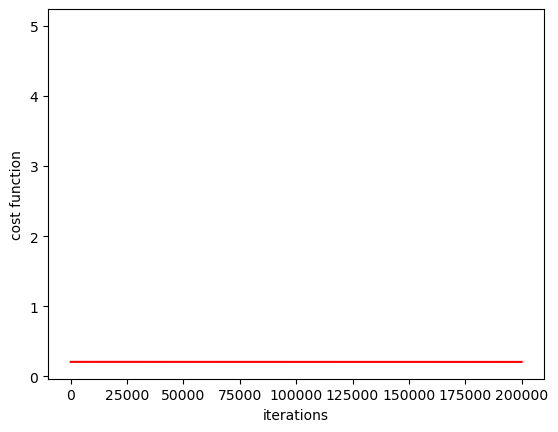

In [21]:
# paramètres
iterations = 200000
alpha = 0.0025
# Appel
theta, costs = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

plt.plot(np.arange(iterations), costs, 'r', 5)
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [22]:
def drawLine():
    x1_values = (np.min(X[:, 1]),np.max(X[:, 1]))
    x2_values = (-theta[0] - theta[1]*x1_values) / theta[2]
    plt.plot(x1_values, x2_values, label='Decision Boundary', color='red')

# Affichage 
Graphe representant les acceptations selon les caracteristiques

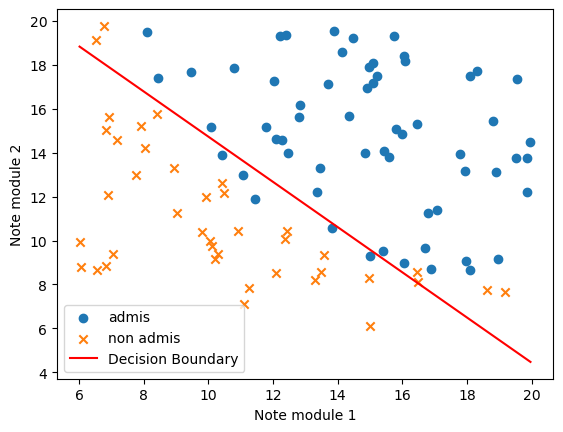

In [23]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="admis",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non admis",marker ='x')

drawLine()

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
plt.show()

Prédire des valeurs de y

In [25]:
note1 = 9
note2 = 17
prediction_feature = np.array([1, note1, note2])
prediction_Imple1 = Sigmoid(np.dot(prediction_feature, theta))
print (prediction_Imple1)
# on peut définir un seuil: 0,5. Si la valeur de la prediction est au dessus de la valeur l'etudiant est admis sinon il est ajourné 

# autre facon de faire la prediction 
predict = np.matmul([1,9, 17],theta)
predict

[0.74741923]


array([1.08489519])

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

[1.]


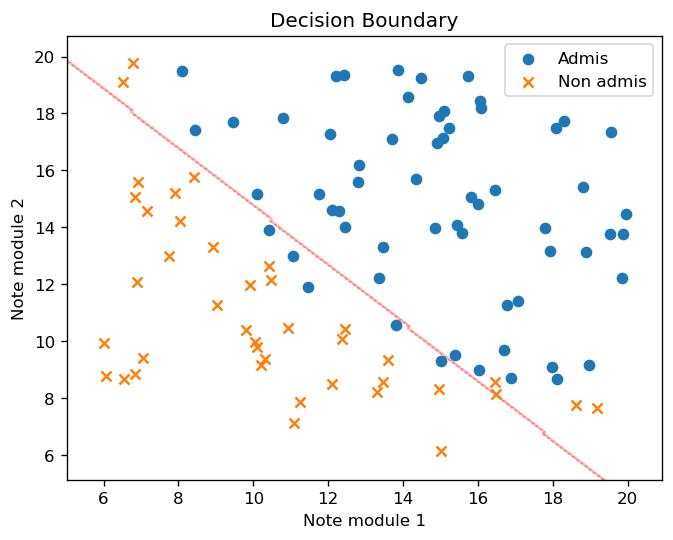

Accuracy for implemented logistic regression: 0.65
Accuracy for scikit-learn logistic regression: 0.85


In [26]:
# model de la regression logistique 
model = LogisticRegression()

# fit the model 
model.fit(X, y)

# prediction pour les notes 9 et 17 
predictionSklearn = model.predict([[1,9,17]])
print(predictionSklearn)

# decision boundary 
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plotting avec sklearn  
plt.figure(dpi=120)
plt.gca().set_facecolor('white')

plt.contourf(xx, yy, Z, alpha=0.3, colors=['white', 'red'])


plt.scatter(X[y == 1, 1], X[y == 1, 2], label="Admis", marker='o')
plt.scatter(X[y == 0, 1], X[y == 0, 2], label="Non admis", marker='x')


plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()


# partitionnement des données pour la comparaison entre la version implementée et celle de sklearn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# version implementée
iterations = 13000
alpha = 0.001
theta_initial = np.zeros((X_train.shape[1], 1))
theta_implemented, costs_implemented = gradientDescent(X_train, y_train, theta_initial, alpha, iterations)

# prediction avec la version implementée 
predictions_implemented = Sigmoid(np.dot(X_test, theta_implemented))
predictions_implemented = (predictions_implemented >= 0.5).astype(int)

# calcule de la pression  
accuracy_implemented = accuracy_score(y_test, predictions_implemented)
print("Accuracy for implemented logistic regression:", accuracy_implemented)


# prediction avec sklearn
predictions_sklearn = model.predict(X_test)

# calcule de la pression
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print("Accuracy for scikit-learn logistic regression:", accuracy_sklearn)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [15]:
# ......................Utilisation de regularisation................................
# Pour renforcer notre apprentissage on peut utiliser la regularisation 
# changement de la function de coût
# On choisit la regularisation L1 ou L2 

def computeCostWithRegularization(X, y, theta, lambda_, regularization='L2'):
    n = X.shape[0]
    h = Sigmoid(np.dot(X, theta))
    
    # calcule coût sans regularisation
    cost = -1 * (np.sum(np.dot(y.T, np.log(h)) + np.dot((1-y), np.log(1-h))) / n)
    
    # pour la régularisation L1, cela implique d'ajouter des termes de pénalité à la fonction de coût
    # puis multipliez-les sur les paramètres de régularisation (λ) pour contrôler la force de régularisation.
    if regularization == 'L1':
        regularization_term = (lambda_ / n) * np.sum(np.abs(theta))
    
    # pour L2 le terme de pénalité est la somme des carrés des coefficients (θ)
    # ils sont multipliés par la moitié du carré du paramètre de régularisation (λ).
    elif regularization == 'L2':
        regularization_term = (lambda_ / (2 * n)) * np.sum(theta[1:]**2) 
    else:
        raise ValueError("Regularization type must be 'L1' or 'L2'")
    
    cost += regularization_term
    return cost

# parameteres pour calculer le cout initial 
n=X.shape[1]
thetaRegularization = np.zeros((n,1))
# valeur de (λ).
lambda_=0.1


#....................................Autres techniques................................................
# 1. Explorer les données et définir d'autres feautures qui peuvent aider dans la prediction 
# 2. Utilisation des metriques lors des implementations et amélioration pour avoir de meilleurs résultats 
# 3. Utilisation de la Cross-validation:
    # diviser notre ensemble de données en plusieurs sous-ensembles (folds)
    # entraîner le modèle sur certains folds tout en l'évaluant sur le fold restant. 
    # répéter ce processus plusieurs fois, chaque fold servira comme ensemble de validation exactement une fois.
# 4. Optimisation du code a l'aide d'une fonction prédefinie pouvant faciliter l'implementation de la descente du gradient 
    # Stochastic Gradient Descent (SGD); Mini-Batch Gradient Descent....